In [8]:
%matplotlib inline
import datetime as datetime
import json
import matplotlib.pyplot as plt
from matplotlib.pyplot import text
plt.style.use("bmh")
plt.rcParams['figure.figsize'] = (10, 5)
import numpy as np
import pandas as pd

## Loading DataFrames

In [9]:
udf = pd.read_pickle('Your/Data/Path/tweaked_user_dataframe.pkl')
udf

,location,id,name,verified,public_metrics.followers_count,public_metrics.following_count,public_metrics.tweet_count,country
0,"Waiyaki Way, Westlands",697374646614781952,AACC-CETA,False,1565,666,2795,Kenya
1,NaN,87371572,ACNA,False,9023,1796,3393,NaN
2,Anglican Communion Office,903497472,Anglican Alliance,False,2291,1195,3599,United Kingdom
3,Rome,761714520,Anglican Centre Rome,False,2681,839,1733,Italia
4,"Nairobi, Kenya",1020255964044328961,Anglican Church of Kenya,False,1095,185,567,Kenya
...,...,...,...,...,...,...,...,...
166,"Federal Way, WA",11859822,World Vision USA,True,554386,14283,92602,Sénégal
164,"Plot 15B Nakasero, Kampala",759998299,World Vision Uganda,False,4278,580,3375,United Kingdom
167,"Dakar, Senegal",830807449,World Vision West Africa,False,2245,563,2088,United States
157,"Addis Ababa, Ethiopia",2231308272,WorldVision Ethiopia,False,1958,178,420,België / Belgique / Belgien


In [10]:
df = pd.read_pickle('Your/Data/Path/tweet_dataframe_p5.pkl')
df

,author_id,text,lang,referenced_tweets,reply_settings,conversation_id,id,created_at,entities.mentions,entities.annotations,...,entities.urls,in_reply_to_user_id,geo.place_id,geo.coordinates.type,geo.coordinates.coordinates,withheld.copyright,withheld.country_codes,withheld.scope,entities.cashtags,text_processed
0,697374646614781952,RT @AWalkerSmith7: @AaccCeta @ArchbishopSapit ...,en,"[{'type': 'retweeted', 'id': '1437029861676228...",everyone,1437051433480753156,1437051433480753156,2021-09-12 13:52:15+00:00,"[{'start': 3, 'end': 17, 'username': 'AWalkerS...","[{'start': 93, 'end': 95, 'probability': 0.919...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[thanking, god, historic, moment, church, hist..."
1,697374646614781952,RT @sceptwic: Another important step in road t...,en,"[{'type': 'retweeted', 'id': '1437043141979295...",everyone,1437051325255192582,1437051325255192582,2021-09-12 13:51:49+00:00,"[{'start': 3, 'end': 12, 'username': 'sceptwic...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[another, important, step, road, #justicedigni..."
2,697374646614781952,Congratulations Ven Rose Okeno ACK Diocese of ...,en,NaN,everyone,1436979065114800131,1436979065114800131,2021-09-12 09:04:41+00:00,NaN,"[{'start': 16, 'end': 29, 'probability': 0.516...",...,"[{'start': 213, 'end': 236, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[congratulations, ven, rose, okeno, ack, dioce..."
3,697374646614781952,Consecration Service of Ven Rose Okeno ACK Dio...,en,NaN,everyone,1436975615480041473,1436975615480041473,2021-09-12 08:50:59+00:00,NaN,"[{'start': 124, 'end': 147, 'probability': 0.5...",...,"[{'start': 239, 'end': 262, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[consecration, service, ven, rose, okeno, ack,..."
4,697374646614781952,We are looking forward to today’s Consecration...,en,"[{'type': 'replied_to', 'id': '143695708915549...",everyone,1436957089155493889,1436957092787757056,2021-09-12 07:37:22+00:00,NaN,"[{'start': 116, 'end': 124, 'probability': 0.6...",...,NaN,697374646614781952,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[looking, forward, today, consecration, enthro..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
308837,2193947323,In our New Year Message to the Nation we proff...,en,"[{'type': 'quoted', 'id': '1082850893807144962'}]",everyone,1082937561537044480,1082937561537044480,2019-01-09 09:50:09+00:00,NaN,NaN,...,"[{'start': 271, 'end': 294, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[new, year, message, nation, proffered, areas,..."
308838,2193947323,RT @NewsDayZimbabwe: THE @zccinzim has launche...,en,"[{'type': 'retweeted', 'id': '1082932233500065...",everyone,1082934512777117696,1082934512777117696,2019-01-09 09:38:02+00:00,"[{'start': 3, 'end': 19, 'username': 'NewsDayZ...",NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[launched, fresh, bid, broker, dialogue, presi..."
308839,2193947323,We can choose the route of engagement or that ...,en,NaN,everyone,1082904479526240256,1082904479526240256,2019-01-09 07:38:41+00:00,"[{'start': 211, 'end': 227, 'username': 'NewsD...",NaN,...,"[{'start': 183, 'end': 206, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[choose, route, engagement, conflict, route, i..."
308840,2193947323,"For many Zimbabweans, 2019 has come amidst muc...",en,NaN,everyone,1082548265617371137,1082548265617371137,2019-01-08 08:03:13+00:00,"[{'start': 187, 'end': 199, 'username': 'EFZZI...",NaN,...,"[{'start': 264, 'end': 287, 'url': 'https://t....",NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,"[many, zimbabweans, come, amidst, much, hardsh..."


## Cleanup

In [11]:
# Functions
# --- Drop columns not needed for analysis from tweet DataFrame
def clean_tweet(df):
    return (df
           .drop(columns=[c for c in df.columns if 'entities.cashtags' in c])
           .drop(columns=['id', 'lang', 'in_reply_to_user_id', 'conversation_id',
                          'public_metrics.retweet_count', 'public_metrics.reply_count',
                          'public_metrics.like_count', 'public_metrics.quote_count',
                          'entities.urls',
                          'geo.place_id', 'geo.coordinates.type', 'geo.coordinates.coordinates', 
                          'withheld.copyright', 'withheld.country_codes', 'withheld.scope', 'reply_settings'])
                          )

# --- Modify tweet DataFrame to add new columns needed for analysis
def modify_tweet(df):
    return (clean_tweet(df)
                .assign(is_reply=df['text'].str.startswith('@'),
                   referenced_type=df['referenced_tweets'].apply(lambda t: t[0]['type'] if isinstance(t, list) else np.nan),
                   length=lambda df_:df_.text.str.len(),
                   tweet_count=1,
                   created_truncated=df['created_at'].apply(lambda d: datetime.date(d.year, d.month, d.day)),
                  )
           )

# --- merge modified tweet and user DataFrames
def create_analysis_frame(df1, df2):
    return(modify_tweet(df1)
            .merge(df2, left_on='author_id', right_on='id', how='left')
            .drop(columns = ['id', 'referenced_tweets', 'verified', 'location',
                                'public_metrics.following_count', 'public_metrics.tweet_count'])
            )

# Main
tdf = create_analysis_frame(df, udf)

with pd.option_context('display.max_colwidth', 280):
    display(tdf)

,author_id,text,created_at,entities.mentions,entities.annotations,entities.hashtags,text_processed,is_reply,referenced_type,length,tweet_count,created_truncated,name,public_metrics.followers_count,country
0,697374646614781952,RT @AWalkerSmith7: @AaccCeta @ArchbishopSapit @LesmoreGEzkiel @DrMwaniki @fmwombeki Thanking God 4 this historic moment n church history n Kenya! 2 God b the glory! Ashe! Amen! @Oikoumene @AaccCeta @AdNAUbuntu @JaCouncilChurch @ncccusa @iamepiscopalian @GETIWCC @WCCpaween @An...,2021-09-12 13:52:15+00:00,"[{'start': 3, 'end': 17, 'username': 'AWalkerSmith7', 'id': '1868363888'}, {'start': 19, 'end': 28, 'username': 'AaccCeta', 'id': '697374646614781952'}, {'start': 29, 'end': 45, 'username': 'ArchbishopSapit', 'id': '798412484742959105'}, {'start': 46, 'end': 61, 'username': '...","[{'start': 93, 'end': 95, 'probability': 0.9196, 'type': 'Other', 'normalized_text': 'God'}]",NaN,"[thanking, god, historic, moment, church, history, kenya, god, glory, ashe, amen]",False,retweeted,363,1,2021-09-12,AACC-CETA,1565,Kenya
1,697374646614781952,RT @sceptwic: Another important step in road to #JusticeDignitySolidarity. Kenyan churches leading the way it seems as number of women in #episcopate rises again. @ACK @full_kenya https://t.co/CAPRZdimkq,2021-09-12 13:51:49+00:00,"[{'start': 3, 'end': 12, 'username': 'sceptwic', 'id': '35702398'}]",NaN,"[{'start': 48, 'end': 73, 'tag': 'JusticeDignitySolidarity'}]","[another, important, step, road, #justicedignitysolidarity, kenyan, churches, leading, way, seems, number, women, #episcopate, rises, <-url->]",False,retweeted,203,1,2021-09-12,AACC-CETA,1565,Kenya
2,697374646614781952,Congratulations Ven Rose Okeno ACK Diocese of Butere. The first Woman Diocesan Bishop in the history of the Anglican Church of Kenya. We thank God for the new chapters being written in the history of the Church. https://t.co/6Up7M3cEsb,2021-09-12 09:04:41+00:00,NaN,"[{'start': 16, 'end': 29, 'probability': 0.5163, 'type': 'Person', 'normalized_text': 'Ven Rose Okeno'}, {'start': 108, 'end': 131, 'probability': 0.5879, 'type': 'Place', 'normalized_text': 'Anglican Church of Kenya'}, {'start': 144, 'end': 146, 'probability': 0.976, 'type':...",NaN,"[congratulations, ven, rose, okeno, ack, diocese, butere, first, woman, diocesan, bishop, history, anglican, church, kenya, thank, god, new, chapters, written, history, church, <-url->]",False,NaN,236,1,2021-09-12,AACC-CETA,1565,Kenya
3,697374646614781952,Consecration Service of Ven Rose Okeno ACK Diocese of Butere. She is the first Woman Diocesan Bishop in the history of the Anglican Church of Kenya. New chapters being written in the history of the Church. We thank God for such moments. https://t.co/hzkus3byb5,2021-09-12 08:50:59+00:00,NaN,"[{'start': 124, 'end': 147, 'probability': 0.5667, 'type': 'Place', 'normalized_text': 'Anglican Church of Kenya'}, {'start': 217, 'end': 219, 'probability': 0.9677, 'type': 'Other', 'normalized_text': 'God'}]",NaN,"[consecration, service, ven, rose, okeno, ack, diocese, butere, first, woman, diocesan, bishop, history, anglican, church, kenya, new, chapters, written, history, church, thank, god, moments, <-url->]",False,NaN,262,1,2021-09-12,AACC-CETA,1565,Kenya
4,697374646614781952,We are looking forward to today’s Consecration and Enthronement of the first Woman Bishop in The Anglican Church of Kenya Ven. Rose Okeno.,2021-09-12 07:37:22+00:00,NaN,"[{'start': 116, 'end': 124, 'probability': 0.6155, 'type': 'Place', 'normalized_text': 'Kenya Ven'}, {'start': 127, 'end': 136, 'probability': 0.8553, 'type': 'Person', 'normalized_text': 'Rose Okeno'}]",NaN,"[looking, forward, today, consecration, enthronement, first, woman, bishop, anglican, church, kenya, ven, rose, okeno]",False,replied_to,138,1,2021-09-12,AACC-CETA,1565,Kenya
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238918,2193947323,In our New Year Message to the Nation we proffered 4 areas that need to be address to avert the possible catastrophe

In [12]:
# Functions
# --- Read keywords from file and return them as list
def prepare_keywords(file):
    keys = pd.read_csv(file)
    s = ''
    return [(s+word) for word in keys['keywords']]

# --- Create new column with value=1 if keyword is in tweet and value=0 if not
def covid_relation(df, keylist):
    return df.assign(covid_related=df['text_processed'].apply(lambda t: 1 if any(f" {keyword} " in ' '.join(t) for keyword in keylist) else 0))

# --- Create new column by inverting the column created above
def no_covid_relation(df, keylist):
    return df.assign(not_covid_related=df['covid_related'].apply(lambda t: 0 if t==1 else 1))

## Analysis Hypothesis A1.1

##### Import keywords

In [13]:
# Load keywords identified in the "Coronavirus (COVID-19) Tweets Dataset" by Lamsal
keylist = prepare_keywords('keywords.txt')
keylist

['corona',
 '#corona',
 'coronavirus',
 '#coronavirus',
 'covid',
 '#covid',
 'covid19',
 '#covid19',
 'covid-19',
 '#covid-19',
 'sarscov2',
 '#sarscov2',
 'sars cov2',
 'sars cov 2',
 'covid_19',
 '#covid_19',
 '#ncov',
 'ncov',
 '#ncov2019',
 'ncov2019',
 '2019-ncov',
 '#2019-ncov',
 'pandemic',
 '#pandemic',
 '#2019ncov',
 '2019ncov',
 'quarantine',
 '#quarantine',
 'flatten the curve',
 'flattening the curve',
 '#flatteningthecurve',
 '#flattenthecurve',
 'hand sanitizer',
 '#handsanitizer',
 '#lockdown',
 'lockdown',
 'social distancing',
 '#socialdistancing',
 'work from home',
 '#workfromhome',
 'working from home',
 '#workingfromhome',
 'ppe',
 'n95',
 '#ppe',
 '#n95',
 '#covidiots',
 'covidiots',
 'herd immunity',
 '#herdimmunity',
 'pneumonia',
 '#pneumonia',
 'chinese virus',
 '#chinesevirus',
 'wuhan virus',
 '#wuhanvirus',
 'kung flu',
 '#kungflu',
 'wearamask',
 '#wearamask',
 'wear a mask',
 'vaccine',
 'vaccines',
 '#vaccine',
 '#vaccines',
 'corona vaccine',
 'corona 

##### Check tweets for COVID-keywords

In [14]:
# Drop columns not needed for this analysis,
# then check if tweet contains COVID keywords
# and add inversion of check as another column
tdf = (tdf
       .drop(columns=['author_id', 'text', 'created_truncated', 'referenced_type',
                      'entities.mentions', 'entities.annotations', 'entities.hashtags',
                      'is_reply', 'length', 'public_metrics.followers_count'])
       .pipe(covid_relation, keylist)
       .pipe(no_covid_relation, keylist)
      )
tdf

,created_at,text_processed,tweet_count,name,country,covid_related,not_covid_related
0,2021-09-12 13:52:15+00:00,"[thanking, god, historic, moment, church, hist...",1,AACC-CETA,Kenya,0,1
1,2021-09-12 13:51:49+00:00,"[another, important, step, road, #justicedigni...",1,AACC-CETA,Kenya,0,1
2,2021-09-12 09:04:41+00:00,"[congratulations, ven, rose, okeno, ack, dioce...",1,AACC-CETA,Kenya,0,1
3,2021-09-12 08:50:59+00:00,"[consecration, service, ven, rose, okeno, ack,...",1,AACC-CETA,Kenya,0,1
4,2021-09-12 07:37:22+00:00,"[looking, forward, today, consecration, enthro...",1,AACC-CETA,Kenya,0,1
...,...,...,...,...,...,...,...
238918,2019-01-09 09:50:09+00:00,"[new, year, message, nation, proffered, areas,...",1,Zimbabwe Council of Churches,NaN,0,1
238919,2019-01-09 09:38:02+00:00,"[launched, fresh, bid, broker, dialogue, presi...",1,Zimbabwe Council of Churches,NaN,0,1
238920,2019-01-09 07:38:41+00:00,"[choose, route, engagement, conflict, route, i...",1,Zimbabwe Council of Churches,NaN,0,1
238921,2019-01-08 08:03:13+00:00,"[many, zimbabweans, come, amidst, much, hardsh...",1,Zimbabwe Council of Churches,NaN,0,1


In [15]:
# Create and display new dataframe containing all tweets that include COVID-keywords

ctdf = tdf[tdf['covid_related']==1]

with pd.option_context('display.max_colwidth', 280):
    display(ctdf)

,created_at,text_processed,tweet_count,name,country,covid_related,not_covid_related
14,2021-08-25 15:38:05+00:00,"[leading, example, circuit, superintendent, freeown, wesley, circuit, mcsl, rev, tom, demby, taking, covid, vaccination, john, ezzidio, hall, lower, hall, wesley, methodist, church, service, last, sunday, let, make, effort, fight, pandemic, sierra, leone, <-url->]",1,AACC-CETA,Kenya,1,0
124,2021-05-25 12:14:47+00:00,"[vaccines, instrument, god, uses, save, lives, every, year, thanks, vaccines, pastors, many, african, churches, longer, conducting, many, funerals, children, thank, rev, mwombeki, strong, voice, favor, #ia2030, routine, immunization, <-url->]",1,AACC-CETA,Kenya,1,0
127,2021-05-25 07:41:45+00:00,"[vaccination, powerful, tool, enables, children, healthy, thrive, immunization, agenda, aims, extend, vaccine, access, achieve, coverage, vaccines, given, childhood, adolescence, let, make, sure, children, everywhere, benefit, vaccines, #ia2030, <-url->]",1,AACC-CETA,Kenya,1,0
129,2021-05-25 07:08:42+00:00,"[countries, gather, week, #wha74, discuss, ending, pandemic, preventing, next, call, prioritize, immunization, deliver, immunization, agenda, everyone, everywhere, benefits, vaccines, #vaccineswork, #ia2030, <-url->]",1,AACC-CETA,Kenya,1,0
178,2021-05-04 16:41:29+00:00,"[call, essay, submissions, pan, african, youth, essay, competition, vol, theme, africa's, burden, rising, iffs, debt, widening, public, finance, gap, context, covid, youth, call, action, #youth4taxjustice, <-url->]",1,AACC-CETA,Kenya,1,0
...,...,...,...,...,...,...,...
238235,2020-03-24 18:00:39+00:00,"[due, confirmed, death, covid, continue, encourage, member, churches, general, population, follow, expert, advice, preventative, measures, reduce, spread, pandemic, find, following, statement, local, languages, shona, nambya, tswana, <-url->]",1,Zimbabwe Council of Churches,NaN,1,0
238237,2020-03-20 17:52:55+00:00,"[face, global, pandemic, covid, different, daily, life, challenges, face, encouraged, smile, journey, together, united, peaceful, prosperous, nation, happy, international, happiness, day, <-url->]",1,Zimbabwe Council of Churches,NaN,1,0
238238,2020-03-17 14:28:32+00:00,"[following, outbreak, covid, zimbabwe, council, churches, would, like, encourage, member, churches, generality, citizens, follow, expert, advise, preventative, measures, reduce, risk, spread, pandemic, hence, following, statement, <-url->]",1,Zimbabwe Council of Churches,NaN,1,0
238266,2020-01-24 11:34:34+00:00,"[chimusoro, presenting, novel, coronavirus, ncov, inter-agency, coordination, committee, health, today, shared, decided, declare, outbreak, global, emergency, however, encouraged, pple, stay, cautious, espclly, travellin, <-url->]",1,Zimbabwe Council of Churches,NaN,1,0


In [16]:
# Add columns for all keywords with value=1 if tweet contains the keyword

for keyword in keylist:
    ctdf[keyword] = ctdf['text_processed'].apply(lambda t: 1 if f" {keyword} " in ' '.join(t) else 0)

ctdf

C:\Users\johan\AppData\Local\Temp\ipykernel_25644\3805989264.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctdf[keyword] = ctdf['text_processed'].apply(lambda t: 1 if f" {keyword} " in ' '.join(t) else 0)
C:\Users\johan\AppData\Local\Temp\ipykernel_25644\3805989264.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  ctdf[keyword] = ctdf['text_processed'].apply(lambda t: 1 if f" {keyword} " in ' '.join(t) else 0)
C:\Users\johan\AppData\Local\Temp\ipykernel_25644\3805989264.py:4: SettingWithCopyWarning:

,created_at,text_processed,tweet_count,name,country,covid_related,not_covid_related,corona,#corona,coronavirus,...,wash ur hands,wash your hands,#washurhands,#washyourhands,#stayathome,#stayhome,#selfisolating,self isolating,bars closed,resturant closed
14,2021-08-25 15:38:05+00:00,"[leading, example, circuit, superintendent, fr...",1,AACC-CETA,Kenya,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
124,2021-05-25 12:14:47+00:00,"[vaccines, instrument, god, uses, save, lives,...",1,AACC-CETA,Kenya,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
127,2021-05-25 07:41:45+00:00,"[vaccination, powerful, tool, enables, childre...",1,AACC-CETA,Kenya,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
129,2021-05-25 07:08:42+00:00,"[countries, gather, week, #wha74, discuss, end...",1,AACC-CETA,Kenya,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
178,2021-05-04 16:41:29+00:00,"[call, essay, submissions, pan, african, youth...",1,AACC-CETA,Kenya,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238235,2020-03-24 18:00:39+00:00,"[due, confirmed, death, covid, continue, encou...",1,Zimbabwe Council of Churches,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238237,2020-03-20 17:52:55+00:00,"[face, global, pandemic, covid, different, dai...",1,Zimbabwe Council of Churches,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238238,2020-03-17 14:28:32+00:00,"[following, outbreak, covid, zimbabwe, council...",1,Zimbabwe Council of Churches,NaN,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
238266,2020-01-24 11:34:34+00:00,"[chimusoro, presenting, novel, coronavirus, nc...",1,Zimbabwe Council of Churches,NaN,1,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0


#### Analyse statistics of keyword usage

In [17]:
# Count occurances for each keyword (keyvalues) and
# create dataframe with values (keyvalues -> keySeries -> keyFrame)

keyvalues = []
for i in range(7,103):
    keyvalues.append(ctdf[ctdf.columns[i]].sum())

keySeries = pd.Series(keyvalues, index=keylist)
keyFrame = keySeries.sort_values(ascending=True).to_frame(name='values')

keyFrame

,values
covidiots,0
#handsanitizer,0
work from home,0
#workfromhome,0
working from home,0
...,...
#coronavirus,1317
coronavirus,1351
pandemic,4735
covid,5320


In [18]:
# Count keywords that are not used within the dataset
keyFrame = keyFrame[keyFrame['values'] != 0]
keyFrame.shape

(53, 1)

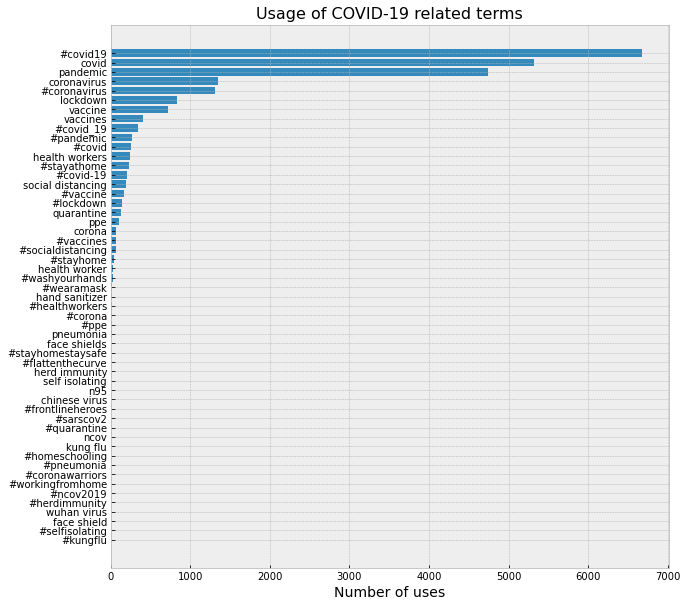

In [19]:
# Create plot depicting all used keywords and their # of occurance

fig, ax = plt.subplots(figsize=(10,10))
ax.barh(keyFrame
        .index,
        keyFrame['values']
       )
ax.set_xlabel('Number of uses', fontsize=14)
plt.title('Usage of COVID-19 related terms', fontsize=16)
plt.savefig('A1_1 Usage distribution all keywords.png', bbox_inches='tight')

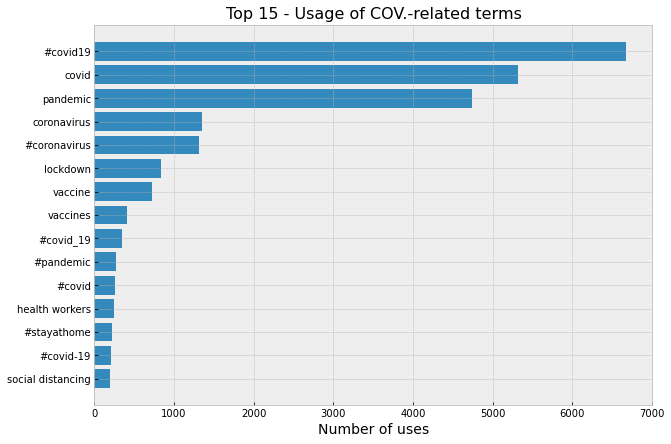

In [20]:
# Create plot depicting most used keywords and their # of occurance

fig, ax = plt.subplots(figsize=(10,7))
ax.barh(keyFrame
        .iloc[-15:]
        .index,
        keyFrame['values']
        .iloc[-15:]
       )
ax.set_xlabel('Number of uses', fontsize=14)
plt.title('Top 15 - Usage of COV.-related terms', fontsize=16)
plt.savefig('A1_1 Usage Top 15 keywords.png', bbox_inches='tight')

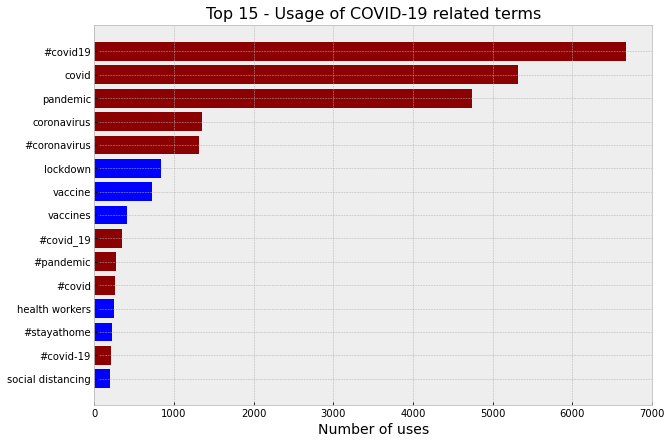

In [21]:
# Create plot depicting most used keywords and their # of occurance
# and color all terms red that are derivatives of "corona" or "covid"

fig, ax = plt.subplots(figsize=(10,7))
ax.barh(keyFrame
        .iloc[-15:]
        .index,
        keyFrame['values']
        .iloc[-15:],
        color=['b', 'darkred', 'b', 'b', 'darkred',
               'darkred', 'darkred', 'b', 'b', 'b',
               'darkred', 'darkred', 'darkred', 'darkred', 'darkred']
       )
ax.set_xlabel('Number of uses', fontsize=14)
plt.title('Top 15 - Usage of COVID-19 related terms', fontsize=16)
plt.savefig('A1_1 Usage distribution Top 15 keywords Filter.png', bbox_inches='tight')

##### Analyse onset and development of COVID-related communication

In [22]:
# Create new dataframe including only keyword columns
# then get total number of COVID-related tweets/day
ddf = (ctdf
        .drop(columns=['text_processed', 'name', 'country'])
        .loc[:, (ctdf != 0).any(axis=0)]
        .set_index('created_at')
        .sort_index()
        .resample('d')
        .sum()
       )

ddf

# The line below can be un-commented and used to check correct execution (should contain only zeros)
#ddf.insert(loc=1, column='not_covid_related', value=ddf['tweet_count']-ddf['covid_related'])


,tweet_count,covid_related,corona,#corona,coronavirus,#coronavirus,covid,#covid,#covid19,#covid-19,...,#healthworkers,#stayhomestaysafe,#frontlineheroes,#coronawarriors,#homeschooling,#washyourhands,#stayathome,#stayhome,#selfisolating,self isolating
created_at,,,,,,,,,,,,,,,,,,,,,
2019-01-28 00:00:00+00:00,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-29 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-30 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-01-31 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2019-02-01 00:00:00+00:00,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2021-09-08 00:00:00+00:00,8,8,0,0,0,0,3,0,2,2,...,0,0,0,0,0,0,0,0,0,0
2021-09-09 00:00:00+00:00,8,8,0,0,0,0,4,0,2,1,...,0,0,0,0,0,0,0,0,0,0
2021-09-10 00:00:00+00:00,8,8,0,0,0,0,2,0,4,0,...,0,0,0,0,0,0,0,0,0,0


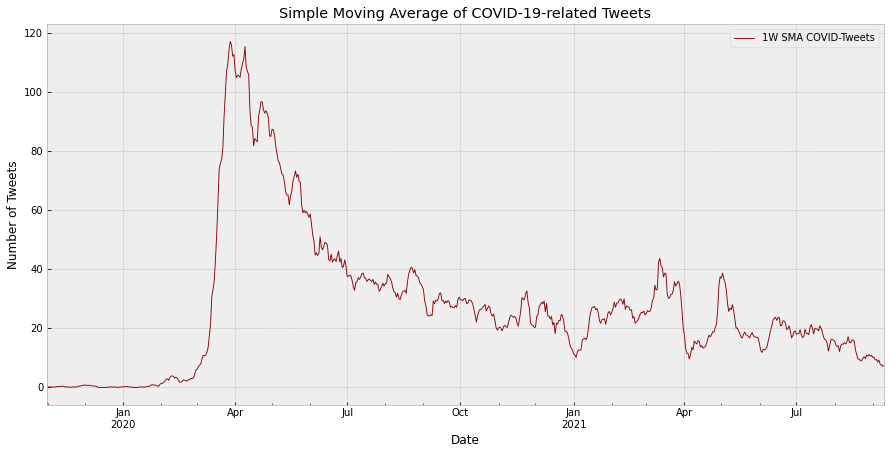

In [23]:
# Create plot depicting total tweets with COVID-related terms over time

fig, axes = plt.subplots(nrows=1, ncols=1, figsize = (15, 7))

(ddf['covid_related']
 .rolling(7)
 .mean()
 .plot(ax=axes, lw=0.9, label='1W SMA COVID-Tweets', color='darkred'));

axes.legend()
axes.set_xlim(18200, 18880)
axes.set_xlabel('Date')
axes.set_ylabel('Number of Tweets')
axes.set_title('Simple Moving Average of COVID-19-related Tweets')
plt.savefig('A1_1 Taking up of COVID-19-related terms.png', bbox_inches='tight')

#### Analyse keywords usage in respect to Twitter User Accounts (TUAs)

In [24]:
# Check for accounts that didnt use any COVID-relatd terms
tdf.groupby('name').sum()[tdf.groupby('name').sum()['covid_related']==0]

,tweet_count,covid_related,not_covid_related
name,,,
Open and Affirming,189,0,189
WSCF Europe,88,0,88


In [25]:
# Create dataframe with total of keyword usage/TUA

nddf = (ctdf
        .groupby('name')
        .sum()
       )

# Add row with total number of uses for each keyword
nddf.loc['key_total'] = nddf.sum(axis=0)
# Add row with percentage of TUA using the keyword
nddf.loc['player_perc'] = ((nddf.astype(bool).sum(axis=0))-1)/124
nddf

,tweet_count,covid_related,not_covid_related,corona,#corona,coronavirus,#coronavirus,covid,#covid,covid19,...,wash ur hands,wash your hands,#washurhands,#washyourhands,#stayathome,#stayhome,#selfisolating,self isolating,bars closed,resturant closed
name,,,,,,,,,,,,,,,,,,,,,
AACC-CETA,55.0,55.0,0.000000,0.000000,0.000000,0.000000,4.000000,32.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
ACNA,24.0,24.0,0.000000,0.000000,0.000000,5.000000,3.000000,7.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Anglican Alliance,22.0,22.0,0.000000,0.000000,0.000000,4.000000,0.000000,17.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Anglican Centre Rome,5.0,5.0,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Anglican Church of Kenya,5.0,5.0,0.000000,0.000000,0.000000,1.000000,0.000000,4.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
World Vision West Africa,87.0,87.0,0.000000,1.000000,0.000000,0.000000,3.000000,13.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
WorldVision Ethiopia,20.0,20.0,0.000000,1.000000,0.000000,0.000000,2.000000,8.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Zimbabwe Council of Churches,205.0,205.0,0.000000,0.000000,0.000000,3.000000,0.000000,117.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,10.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000


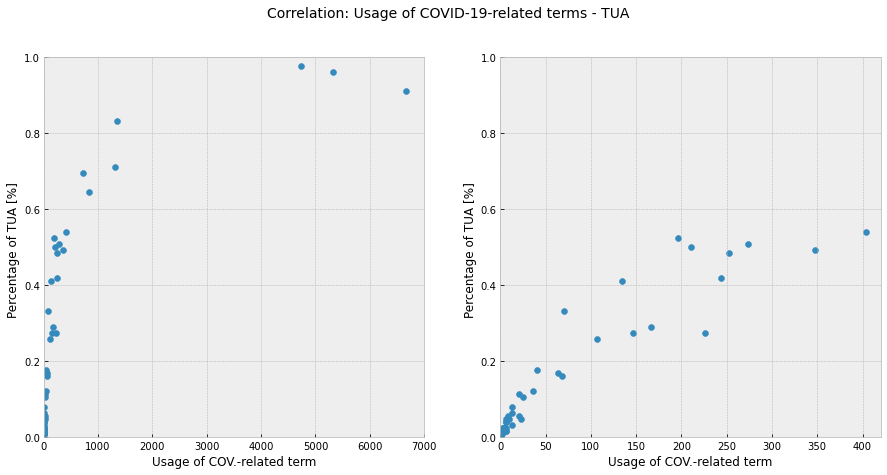

In [26]:
# Create scatterplot showing correlation between total usage of keywords and percentage of players using them

plotdf = (nddf
          .iloc[-2:]
          .drop(columns=['tweet_count', 'covid_related', 'not_covid_related'])
          .T)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize = (15, 7))

# Plot 1: Show large scatterplot
axes[0].scatter(x = plotdf['key_total'], y = plotdf['player_perc'])
axes[0].set_xlabel("Usage of COV.-related term")
axes[0].set_ylabel("Percentage of TUA [%] ")
axes[0].set_xlim(0,7000)
axes[0].set_ylim(0,1)

# Plot 2: Show section of scatterplot to increase resolution on lower frequency keywords
axes[1].scatter(x = plotdf['key_total'], y = plotdf['player_perc'])
axes[1].set_xlabel("Usage of COV.-related term")
axes[1].set_ylabel("Percentage of TUA [%] ")
axes[1].set_xlim(0,420)
axes[1].set_ylim(0,1)
fig.suptitle("Correlation: Usage of COVID-19-related terms - TUA", fontsize=14)

plt.savefig('A1_1 Correlation Usage Distribution.png', bbox_inches='tight')